In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [ ]:
# Generate synthetic dataset
n_samples, n_features = 5000, 3
X = np.random.randn(n_samples, n_features)
true_w = np.array([2.0, -3.0, 1.5])  # True weights
y = X @ true_w + 0.5 * np.random.randn(n_samples)  # Noisy observations

In [ ]:
def compute_gradient_descent_loss(X:np.ndarray, y:np.ndarray, initial_weights:np.ndarray,  dt:float, n_iterations:int):
    """ Compute the exponential lower bound of the loss function"""
    # Gradient descent
    w = initial_weights
    macro_loss = []

    for i in range(n_iterations):
        y_pred = X @ w
        error = y - y_pred        
        grad_f = X
        grad_micro = - error.reshape(-1, 1) * grad_f
        grad_macro = np.mean(grad_micro, axis=0)
        w -= dt * grad_macro
        macro_loss.append(0.5 * np.mean(error**2))
        
    return macro_loss



def compute_analytical_lower_bound(X:np.ndarray, y:np.ndarray, initial_weights:np.ndarray,  dt:float, n_iterations:int):
    """ Compute the exponential lower bound of the loss function
        For linear regression K = max{ ||xi|| for i=1,.., len(X)}
    """
    n_samples, _ = X.shape

    #compute the K-constant gradient
    norms = [np.linalg.norm(X[i,:], ord=2) for i in range(n_samples)]
    K = np.sqrt(np.mean(norms))
    
    #compute initial loss
    initial_micro_losses = [0.5 * (y[i] - initial_weights @ X[i,:])**2 for i in range(n_samples)]
    initial_macro_loss = np.mean(initial_micro_losses)

    #compute lower bound trajectory
    t = np.arange(0, n_iterations) * dt
    macro_loss = initial_macro_loss * np.exp( - 2 * K**2 * t)
    return macro_loss




# Initialize weights
w0 = np.zeros(n_features)
dt = 1e-1  # Step size
n_iterations = 30
tspan = np.arange(0, n_iterations)
lb = compute_analytical_lower_bound(X, y, initial_weights=w0, dt=dt, n_iterations=n_iterations)
lg = compute_gradient_descent_loss(X, y, initial_weights=w0, dt=dt, n_iterations=n_iterations)

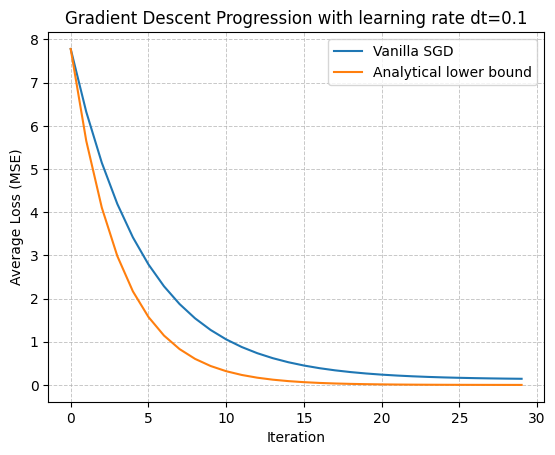

In [9]:
plt.plot(tspan, lg, label="Vanilla SGD")
plt.plot(tspan, lb, label="Analytical lower bound")

plt.xlabel("Iteration")
plt.ylabel("Average Loss (MSE)")
plt.title(f"Gradient Descent Progression with learning rate dt={dt}")

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()